# Исследование объявлений о продаже квартир
В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#прочитаем файл с данными и сохраним всю таблицу в переменную df
df = pd.read_csv('/datasets/real_estate_data.csv',sep= '\t')
#методами head,tail,simple,info и describe осмотрим данные 
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1392,9,8000000.0,70.0,2017-04-17T00:00:00,2,2.50,13.0,36.0,13,False,...,13.0,2.0,Санкт-Петербург,37347.0,9820.0,1.0,364.0,0.0,NaN,143.0
12803,5,5200000.0,68.1,2016-12-23T00:00:00,3,NaN,4.0,NaN,3,NaN,...,NaN,0.0,Санкт-Петербург,16978.0,14811.0,1.0,320.0,0.0,NaN,326.0
7308,18,6980000.0,73.9,2018-04-03T00:00:00,3,3.28,4.0,52.7,3,NaN,...,6.8,NaN,Санкт-Петербург,20291.0,3316.0,1.0,272.0,1.0,680.0,NaN
4494,5,3500000.0,40.0,2017-09-25T00:00:00,1,2.70,20.0,15.4,12,NaN,...,11.1,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,72.0
8929,20,11500000.0,98.0,2017-10-17T00:00:00,3,NaN,9.0,61.5,3,NaN,...,12.7,5.0,Санкт-Петербург,46377.0,17523.0,1.0,302.0,0.0,NaN,90.0
10076,5,3200000.0,25.0,2019-04-23T00:00:00,1,3.50,6.0,NaN,4,NaN,...,NaN,NaN,Санкт-Петербург,24660.0,5228.0,1.0,540.0,0.0,NaN,NaN
2072,5,3550000.0,37.2,2017-12-27T00:00:00,1,2.50,9.0,NaN,4,NaN,...,NaN,NaN,Санкт-Петербург,13413.0,12209.0,0.0,NaN,1.0,1175.0,232.0
11944,4,5400000.0,74.0,2018-11-14T00:00:00,3,NaN,18.0,47.7,4,NaN,...,8.7,NaN,Санкт-Петербург,43157.0,22488.0,0.0,NaN,1.0,933.0,40.0
17274,7,4150000.0,60.3,2016-05-24T00:00:00,2,2.80,9.0,31.4,6,False,...,9.6,1.0,посёлок Металлострой,25998.0,27710.0,0.0,NaN,0.0,NaN,45.0
22079,10,6600000.0,55.3,2017-10-26T00:00:00,2,3.00,5.0,34.0,1,NaN,...,8.1,NaN,Санкт-Петербург,10831.0,10900.0,0.0,NaN,0.0,NaN,428.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Описание данных**\
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) \
`balcony` — число балконов\
`ceiling_height` — высота потолков (м)\
`cityCenters_nearest` — расстояние до центра города (м)\
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)\
`first_day_exposition` — дата публикации\
`floor` — этаж\
`floors_total` — всего этажей в доме\
`is_apartment` — апартаменты (булев тип)\
`kitchen_area` — площадь кухни в квадратных метрах (м²)\
`last_price` — цена на момент снятия с публикации\
`living_area` — жилая площадь в квадратных метрах (м²)\
`locality_name` — название населённого пункта\
`open_plan` — свободная планировка (булев тип)\
`parks_around3000` — число парков в радиусе 3 км\
`parks_nearest` — расстояние до ближайшего парка (м)\
`ponds_around3000` — число водоёмов в радиусе 3 км\
`ponds_nearest` — расстояние до ближайшего водоёма (м)\
`rooms` — число комнат\
`studio` — квартира-студия (булев тип)\
`total_area` — площадь квартиры в квадратных метрах (м²)\
`total_images` — число фотографий квартиры в объявлении\

### Выводы 

- Некорректные название некоторых столбцов (например, `cityCenters_nearest`)
- Присутствуют пропущенные значения (в некоторых столбцах очень большое количество)
- Аномальные  или просто подозрительные значения(max(`ceiling_height`) - 100 ,`rooms` - 19)
- Проверить данные на дубликаты
- Неправильные типы данных для некоторых столбцов 

На стадии предобработки данных необходимо отработать все проблемы 

## Предобработка данных

### Названия столбцов, пропуски

Для начала переименуем столбцы для удобства работы с таблицей.Так же в некоторых столбцах допишем в название единицу измерения

In [7]:
df = df.rename(
    columns={'airports_nearest':'distance_to_airport_m',
             'cityCenters_nearest':'distance_to_center_city_m',
             'parks_around3000':'parks_around_3000',
             'parks_nearest':'distance_to_parks_m',
             'ponds_around3000':'ponds_around_3000',
             'ponds_nearest':'distance_to_ponds_m',
             'ceiling_height' : 'ceiling_height_m',
             'kitchen_area':'kitchen_area_m2',
             'living_area':'living_area_m2',
             'total_area':'total_area_m2'
             })
#проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_images               23699 non-null  int64  
 1   last_price                 23699 non-null  float64
 2   total_area_m2              23699 non-null  float64
 3   first_day_exposition       23699 non-null  object 
 4   rooms                      23699 non-null  int64  
 5   ceiling_height_m           14504 non-null  float64
 6   floors_total               23613 non-null  float64
 7   living_area_m2             21796 non-null  float64
 8   floor                      23699 non-null  int64  
 9   is_apartment               2775 non-null   object 
 10  studio                     23699 non-null  bool   
 11  open_plan                  23699 non-null  bool   
 12  kitchen_area_m2            21421 non-null  float64
 13  balcony                    12180 non-null  flo

In [8]:
#посмотрим количество пропущенных значений по столбцам 
df.isna().sum().sort_values()

total_images                     0
open_plan                        0
floor                            0
rooms                            0
studio                           0
total_area_m2                    0
last_price                       0
first_day_exposition             0
locality_name                   49
floors_total                    86
living_area_m2                1903
kitchen_area_m2               2278
days_exposition               3181
ponds_around_3000             5518
parks_around_3000             5518
distance_to_center_city_m     5519
distance_to_airport_m         5542
ceiling_height_m              9195
balcony                      11519
distance_to_ponds_m          14589
distance_to_parks_m          15620
is_apartment                 20924
dtype: int64

13 столбцов имеют пропущенные значения! Нужно разобраться с каждым(удалять/не трогать/заменять на другие значения, если заменять, то на какие). Начнем от меньшего к большему. Посмотрим на эти же значения в процентах

In [9]:
display((df.isna().sum().sort_values()/df.shape[0]) * 100)

total_images                  0.000000
open_plan                     0.000000
floor                         0.000000
rooms                         0.000000
studio                        0.000000
total_area_m2                 0.000000
last_price                    0.000000
first_day_exposition          0.000000
locality_name                 0.206760
floors_total                  0.362885
living_area_m2                8.029875
kitchen_area_m2               9.612220
days_exposition              13.422507
ponds_around_3000            23.283683
parks_around_3000            23.283683
distance_to_center_city_m    23.287902
distance_to_airport_m        23.384953
ceiling_height_m             38.799105
balcony                      48.605426
distance_to_ponds_m          61.559559
distance_to_parks_m          65.909954
is_apartment                 88.290645
dtype: float64

Пропуски в `locality_name` и `floors_total` трогать не будем. Пропущенных значений менее 0,5%, на результаты анализа не повлияет. Так же мы не можем адекватно заменить значения средними или медианными значениями

Пропуски `living_area_m2` и `kitchen_area_m2` мы можем заменить значениями относительно `total_area_m2`. Мы найдем средний коэффициент отношения `total_area` к `living_area` и `kitchen_area`. И в строках с пропусками умножим соответствующую `total_area` на эти коэффициенты

Столбцы `days_exposition`,`ponds_around_3000`,`parks_around_3000`,`distance_to_center_city`,`distance_to_airport`, \` `ceiling_height_m`,`distance_to_ponds_m`, `distance_to_parks_m` не имеют подходящего значения на замену. Не будем делать замену ради замены. Оставим, как есть  

In [10]:
#введем временную series - отношение living_area к total_area
living_to_total = df['living_area_m2']/df['total_area_m2']
#и найдём среднее значение по этому series
ratio_living_total = living_to_total.mean()
display(ratio_living_total)

0.5647655216993234

Таким образом, мы нашли средний коэффициент отношения жилой площади к общей площади. Или по-другому: в среднем living_area составляет 56% от total_area

In [11]:
#заменим пропуски в living_area_m2 значениями из столбца total_area_m2 * ratio_living_total
df['living_area_m2'] = df['living_area_m2'].fillna(df['total_area_m2']*ratio_living_total)

In [12]:
#всё тоже самое проделаем и для kitchen_area_m2
kitchen_to_total = df['kitchen_area_m2']/df['total_area_m2']
ratio_kitchen_total = kitchen_to_total.mean()
df['kitchen_area_m2'] = df['kitchen_area_m2'].fillna(df['total_area_m2']*ratio_kitchen_total)

In [13]:
#скорее всего для столбца balcony пропуски - отсутствие балконов. заменим пропуски на 0 
df['balcony'] = df['balcony'].fillna(0)

In [14]:
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,kitchen_area_m2,balcony,locality_name,distance_to_airport_m,distance_to_center_city_m,parks_around_3000,distance_to_parks_m,ponds_around_3000,distance_to_ponds_m,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,89.797718,9,NaN,...,29.789403,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [15]:
#проверим на дубликаты
df.duplicated().sum()

0

Проверим столбец `locality_name` на неявные дубликаты

In [16]:
len(list(df['locality_name'].unique()))

365

365 уникальных названий населённых пунктов. Для начала приведём все название к нижнему регистру, возможно проблема в нём и ещё раз посчитаем количество уникальных значений 

In [17]:
df['locality_name'] = df['locality_name'].str.lower()
len(list(df['locality_name'].unique()))

365

Не помогло. Посмотрим на названия, возможно появится идея 

In [18]:
df['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Есть проблема с буквами Ё и Ё (поселок и посёлок). Заменим все буквы Ё на Е и посмотрим количесто уникальных значений.

In [19]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
len(df['locality_name'].unique())

331

Убрали 34 неявных дубликата

### Изменение типа данных столбцов

Заменим типы данных в некоторых столбцах:
-  `last_price`,`balcony`,`floors_total`, `parks_around_3000`, `ponds_around_3000`,`days_exposition` - тип данных float заменим на int
- `is_apartment` - заменим тип данных object на bool
- `first_day_exposition` - заменим тип данных object на datetime

In [20]:
#заменим тип данных balcony на int
df['balcony'] = pd.array(df['balcony'], dtype = pd.Int64Dtype())
df['parks_around_3000'] = pd.array(df['parks_around_3000'], dtype = pd.Int64Dtype())
df['ponds_around_3000'] = pd.array(df['ponds_around_3000'], dtype = pd.Int64Dtype())
df['last_price'] = pd.array(df['last_price'], dtype = pd.Int64Dtype())
#чтобы заменить тип данных в столбце days_exposition сначала значения нуно округлить
df['days_exposition'] = df['days_exposition'].round(0)
df['days_exposition'] = pd.array(df['days_exposition'], dtype = pd.Int64Dtype())

In [21]:
#посмотрим на значения в столбце is_apartment
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [22]:
#заменим тип данных на bool
df['is_apartment'] = df['is_apartment'].astype('bool')

In [23]:
#приведём значение столбца first_day_exposition в тип данных datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23699 non-null  int64         
 1   last_price                 23699 non-null  Int64         
 2   total_area_m2              23699 non-null  float64       
 3   first_day_exposition       23699 non-null  datetime64[ns]
 4   rooms                      23699 non-null  int64         
 5   ceiling_height_m           14504 non-null  float64       
 6   floors_total               23613 non-null  float64       
 7   living_area_m2             23699 non-null  float64       
 8   floor                      23699 non-null  int64         
 9   is_apartment               23699 non-null  bool          
 10  studio                     23699 non-null  bool          
 11  open_plan                  23699 non-null  bool          
 12  kitc

**Вывод**: Данные предобработали. Можно производить расчеты

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

In [25]:
#добавим в таблицу столбец price_per_m2 - цену квадратного метра
#для этого разделим значение столбца total_area на значение столбца last_price
df['price_per_m2'] = (df['last_price'] / df['total_area_m2']).astype('int')
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,balcony,locality_name,distance_to_airport_m,distance_to_center_city_m,parks_around_3000,distance_to_parks_m,ponds_around_3000,distance_to_ponds_m,days_exposition,price_per_m2
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,True,...,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,True,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,89.797718,9,True,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000


### День, месяц и год публикации объявления

In [26]:
#добавим 3 столбца: день, месяц и год публикации объявления 
df['day_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,distance_to_center_city_m,parks_around_3000,distance_to_parks_m,ponds_around_3000,distance_to_ponds_m,days_exposition,price_per_m2,day_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,16028.0,1,482.0,2,755.0,<NA>,120370,Thursday,March,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,True,...,18603.0,0,NaN,0,NaN,81,82920,Tuesday,December,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,True,...,13933.0,1,90.0,2,574.0,558,92785,Thursday,August,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,89.797718,9,True,...,6800.0,2,84.0,3,234.0,424,408176,Friday,July,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,8098.0,2,112.0,1,48.0,121,100000,Tuesday,June,2018


### Этаж квартиры

In [27]:
#добавим столбец со статусом этажа квартиры: первый,последний, другой
#для начала определим функцию, которая будет нам возвращать необходимые значения статуса 
def status_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [28]:
df['status_floor'] = df.apply(status_floor, axis = 1)
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,parks_around_3000,distance_to_parks_m,ponds_around_3000,distance_to_ponds_m,days_exposition,price_per_m2,day_exposition,month_exposition,year_exposition,status_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,1,482.0,2,755.0,<NA>,120370,Thursday,March,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,True,...,0,NaN,0,NaN,81,82920,Tuesday,December,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,True,...,1,90.0,2,574.0,558,92785,Thursday,August,2015,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,89.797718,9,True,...,2,84.0,3,234.0,424,408176,Friday,July,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,2,112.0,1,48.0,121,100000,Tuesday,June,2018,другой


### Соотношение жилой и площади кухни к общей площади

In [29]:
#добавим 2 новых столба: отношение жилой и общей площади, а также отношение площади кухни к общей
df['ratio_living_total_area'] = df['living_area_m2'] / df['total_area_m2']
df['ratio_kitchen_total_area'] = df['kitchen_area_m2'] / df['total_area_m2']
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,ponds_around_3000,distance_to_ponds_m,days_exposition,price_per_m2,day_exposition,month_exposition,year_exposition,status_floor,ratio_living_total_area,ratio_kitchen_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,...,2,755.0,<NA>,120370,Thursday,March,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,True,...,0,NaN,81,82920,Tuesday,December,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.300000,4,True,...,2,574.0,558,92785,Thursday,August,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,89.797718,9,True,...,3,234.0,424,408176,Friday,July,2015,другой,0.564766,0.187355
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,1,48.0,121,100000,Tuesday,June,2018,другой,0.320000,0.410000


**Вывод**: Добавили необходимые расчеты. Начнём исследовать данные 

## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков

In [30]:
#для начала посмотри описательные статистики по интересующим нас столбцам
df.describe()

,total_images,last_price,total_area_m2,rooms,ceiling_height_m,floors_total,living_area_m2,floor,kitchen_area_m2,balcony,...,distance_to_center_city_m,parks_around_3000,distance_to_parks_m,ponds_around_3000,distance_to_ponds_m,days_exposition,price_per_m2,year_exposition,ratio_living_total_area,ratio_kitchen_total_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.562480,5.892358,10.572683,0.591080,...,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,9.942121e+04,2017.367146,0.564766,0.187355
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.326965,4.885249,6.095394,0.959298,...,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,5.030681e+04,1.039771,0.101049,0.069372
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,...,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.658500e+04,2017.000000,0.500000,0.136859
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.080000,0.000000,...,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,9.500000e+04,2017.000000,0.564766,0.182292
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,1.000000,...,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142560e+05,2018.000000,0.631579,0.223717
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,2019.000000,1.000000,0.787879


Предварительные выводы:
- Подозрительно выгляит max(total_area) = 900м2 - это значения однозначно выбивается из строя
- Так же подозрительно выглядит выбивающееся значения max(last_price) - 763 миллионов? 
- Аналогично с комнатами: 19 комнат? 
- Минимальная высота потолка 1м? ,а максимальная - 100м?

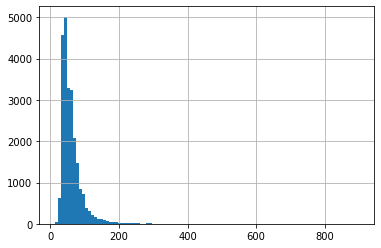

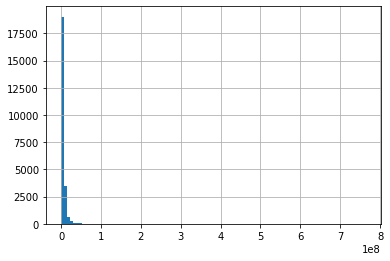

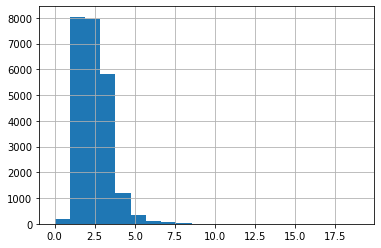

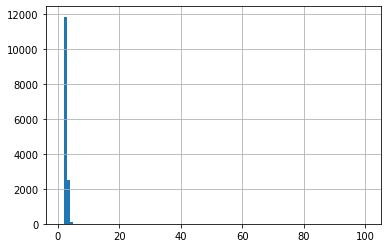

In [31]:
#посмотрим на гистограммы интересующих нас данных 
df['total_area_m2'].hist(bins = 100)
plt.show()
df['last_price'].hist(bins = 100)
plt.show()
df['rooms'].hist(bins = 20)
plt.show()
df['ceiling_height_m'].hist(bins = 100)
plt.show()

На всех графиках одна и та же проблема - выбросы. \
Выбросами считаются значения , которые  :
- меньше 25% квантиля на 1.5 * межквантильный размах 
- больше 75% квантиля на 1.5 * межквантильный размах

### Изучим время продажи квартиры

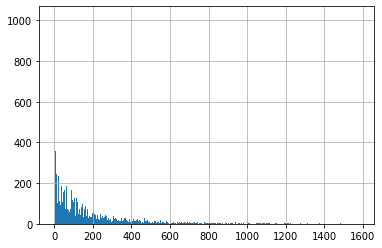

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [32]:
#построим гистрограмму
df['days_exposition'].hist(bins = 1000)
plt.show()
#посмотрим на описательные статистики( в том числе среднее и медиану)
df['days_exposition'].describe()

Обычно продажи квартиры занимает 95 дней (медианное значение). Как указано выше: все значение отклоняющиеся от 25% и 75% квантиля на 1.5 межквантильного размаха - выбросы

In [33]:
#посчитаем необычно долго для продажи квартиры 
(df['days_exposition'].quantile(0.75) + 
            (1.5 * (df['days_exposition'].quantile(0.25) + df['days_exposition'].quantile(0.75))))

647.5

То есть если продажа квартиры занимала более 647.5 (почти 2 года) - это необычно долго. Похоже на правду

In [34]:
#посчитаем очень быстро для продажи квартиры 
#здесь мы не можем посмотреть отклонение выбросов меньше 25% квантиля - меньше 0 быть не может
#примем решение - возьмём порог 5%-ого квантиля за "очень быстро"
df['days_exposition'].quantile(0.05)

9.0

И правда - продать квартиру за 9 дней это очень быстро

### Уберем редкие и выбивающиеся значения по интересующим нас столбцам: площадь, цена, комнаты, высота потолков, время продажи

In [35]:
#введём функцию ,которая пройдет по необходимым столбцам и уберет строки со значениями выбросами
def outlier_value_filter(df, column):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filtered_column = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    return df.loc[filtered_column]

In [36]:
#отфильтруем исходное df и создадим новую таблицу с отфильтрованными данными 
filtred_df = outlier_value_filter(df,'days_exposition')
display(filtred_df)

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,ponds_around_3000,distance_to_ponds_m,days_exposition,price_per_m2,day_exposition,month_exposition,year_exposition,status_floor,ratio_living_total_area,ratio_kitchen_total_area
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.600000,1,True,...,0,NaN,81,82920,Tuesday,December,2018,первый,0.460396,0.272277
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,89.797718,9,True,...,3,234.0,424,408176,Friday,July,2015,другой,0.564766,0.187355
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,1,48.0,121,100000,Tuesday,June,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,NaN,12.0,14.400000,5,True,...,<NA>,NaN,55,95065,Monday,September,2018,другой,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,NaN,26.0,10.600000,6,True,...,0,NaN,155,99195,Thursday,November,2017,другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.3,2018-02-28,1,2.86,15.0,16.300000,4,True,...,2,652.0,29,100566,Wednesday,February,2018,другой,0.461756,0.257790
23690,3,5500000,52.0,2018-07-19,2,NaN,5.0,31.000000,2,True,...,0,NaN,15,105769,Thursday,July,2018,другой,0.596154,0.115385
23692,2,1350000,30.0,2017-07-07,1,NaN,5.0,17.500000,4,True,...,<NA>,NaN,413,45000,Friday,July,2017,другой,0.583333,0.200000
23693,9,4600000,62.4,2016-08-05,3,2.60,9.0,40.000000,8,True,...,1,675.0,239,73717,Friday,August,2016,другой,0.641026,0.128205


In [37]:
#создадим список оставшихся столбцов, по которым мы хотим отфильтровать таблицу(убрать выбросы)
columns_with_outliers = ['total_area_m2','last_price','rooms','ceiling_height_m']
#циклом применим нашу функцию-фильтр по всем нужным столбцам
for column in columns_with_outliers:
    filtred_df = outlier_value_filter(filtred_df,column)

In [38]:
#проверим значения
filtred_df.describe()

,total_images,last_price,total_area_m2,rooms,ceiling_height_m,floors_total,living_area_m2,floor,kitchen_area_m2,balcony,...,distance_to_center_city_m,parks_around_3000,distance_to_parks_m,ponds_around_3000,distance_to_ponds_m,days_exposition,price_per_m2,year_exposition,ratio_living_total_area,ratio_kitchen_total_area
count,9097.000000,9.097000e+03,9097.000000,9097.000000,9097.000000,9094.000000,9097.000000,9097.000000,9097.000000,9097.000000,...,7047.000000,7047.000000,2826.000000,7047.000000,3184.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000
mean,9.941299,4.559001e+06,49.958335,1.803012,2.643201,10.709259,28.448446,5.825877,9.130412,0.710014,...,15574.518235,0.525898,473.542463,0.649780,552.208229,126.108717,92494.263054,2017.518962,0.562326,0.190789
std,5.444518,1.812049e+06,15.258243,0.782040,0.147859,6.271570,10.930395,4.702263,3.332228,0.969807,...,8275.839391,0.739677,290.786153,0.849242,276.858487,119.920209,27574.589152,0.810752,0.096058,0.065148
min,0.000000,4.500000e+05,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,2.000000,0.000000,...,329.000000,0.000000,3.000000,0.000000,16.000000,1.000000,9615.000000,2015.000000,0.038462,0.064815
25%,6.000000,3.328000e+06,38.000000,1.000000,2.500000,5.000000,18.000000,2.000000,6.800000,0.000000,...,11338.000000,0.000000,293.250000,0.000000,335.000000,38.000000,76470.000000,2017.000000,0.502326,0.142857
50%,10.000000,4.300000e+06,46.500000,2.000000,2.600000,9.000000,28.000000,4.000000,8.500000,0.000000,...,13956.000000,0.000000,458.000000,0.000000,544.500000,82.000000,93366.000000,2018.000000,0.564766,0.185369
75%,14.000000,5.550000e+06,60.000000,2.000000,2.720000,15.000000,35.550000,8.000000,10.700000,1.000000,...,16630.000000,1.000000,607.750000,1.000000,760.000000,180.000000,108750.000000,2018.000000,0.625724,0.228942
max,35.000000,1.000565e+07,107.300000,3.000000,3.120000,60.000000,72.000000,27.000000,43.200000,5.000000,...,64857.000000,3.000000,3190.000000,3.000000,1344.000000,512.000000,312240.000000,2019.000000,0.973262,0.723270


Отлично! Теперь максимальные значения выглядит более реалистичным. Далее будет работать с таблицей filtred_df

### Какие факторы больше всего влияют на стоимость квартиры?

Зависит ли цена за квадратный метр от площади, числа комнат, удаленности от центра?

In [39]:
#посчитаем значение корреляции для интересующих нас факторов
#начнём с площади
filtred_df['price_per_m2'].corr(filtred_df['total_area_m2'])

-0.14709214541901447

Вывод : Можно говорить о зависимости ,если коэффициент корреляции достигает значение (по модулю) от 0.7 до 1. У нас " - 0.15". Зависимость между между площадью квартиры и стоиомстью квадратного метра - отсутствует. 

In [40]:
#что насчёт комнат
filtred_df['price_per_m2'].corr(filtred_df['rooms'])

-0.2738565931538932

Вывод: Значение коэффициента корреляции не достигает "значимой" отметки. Зависимость между количеством комнат и ценой за квадратный метр - отсутствует.

In [41]:
#а расстояние от центра?
filtred_df['price_per_m2'].corr(filtred_df['distance_to_center_city_m'])

-0.3971133661077434

**Вывод**: Логично. Чем дальше квартира от центра, тем дешевле цена за квадратный метр  

Зависит ли цена квадратного метра от этажа (первом, последнем, другом)? 

In [42]:
#здесь удобнее сделать анализ через сводную таблицу с выводом основных функций 
pd.pivot_table(filtred_df, index = 'status_floor',values = 'price_per_m2',aggfunc = ['mean','median','max','min'])

,mean,median,max,min
,price_per_m2,price_per_m2,price_per_m2,price_per_m2
status_floor,,,,
другой,96095.980826,96433.5,248484,12686
первый,79178.007005,81004.0,192592,9615
последний,84653.852766,85897.0,312240,10769


**Вывод**: Цена за м2 квартиры на первом этаже дешевле, чем на остальных. Средняя и медианная цена последнего этажа тоже ниже всех остальных( кроме первого). Отдельно стоит отметить max цену последнего этажа - возможно это penthouse. Цена таких верхних этажей выше среднего, чем во всем доме.

Зависит ли цена от даты размещения? Дня недели, месяца, года? 

In [43]:
#так же построим сводную таблицу 
pd.pivot_table(filtred_df, index = 'day_exposition',values = 'price_per_m2',aggfunc = ['mean','median','max','min'])

,mean,median,max,min
,price_per_m2,price_per_m2,price_per_m2,price_per_m2
day_exposition,,,,
Friday,92942.217565,92896.0,240000,13303
Monday,92318.725244,93913.5,189486,12422
Saturday,90726.414439,90575.5,248484,12686
Sunday,92140.984177,92598.5,201729,15540
Thursday,92936.101716,93670.5,201315,9615
Tuesday,93065.259010,94323.0,312240,10769
Wednesday,92142.355394,93314.0,234920,11688


**Вывод**: Зависимости между ценой за квадратный метр и днём размещения объявления нет 

In [44]:
pd.pivot_table(filtred_df, index = 'month_exposition',values = 'price_per_m2',aggfunc = ['mean','median','max','min'])

,mean,median,max,min
,price_per_m2,price_per_m2,price_per_m2,price_per_m2
month_exposition,,,,
April,94409.170927,93630.5,312240,20466
August,93937.118644,94462.0,248484,9615
December,93010.633613,93824.0,234920,12686
February,92335.310440,93253.5,200119,10185
January,92828.224872,94430.0,219512,12422
July,92083.360882,93381.0,200000,11688
June,89484.811912,91196.0,210176,16666
March,91854.264293,92777.0,198950,14130


**Вывод**: Аналогично, как и днём размещения 

In [45]:
pd.pivot_table(filtred_df,index = 'year_exposition', values = 'price_per_m2',aggfunc = ['mean','median','max','min'])

,mean,median,max,min
,price_per_m2,price_per_m2,price_per_m2,price_per_m2
year_exposition,,,,
2015,88573.174497,88936,234920,30232
2016,90092.677650,89842,214285,23333
2017,90166.301049,90702,237500,10769
2018,92869.534776,94545,248484,9615
2019,104052.102962,104260,312240,10185


**Вывод**: Здесь зависимость есть. Всё логично - с каждым годом цена растёт вслед за общей инфляцией.

### 10 населённых пунктов с наибольшим числом объявлений

In [46]:
#найдём 10 locality_name с наибольшем числом объявлений и посчитаем среднюю стоимость квадратного метра в каждом 
top_10_locality_name = (pd.pivot_table(filtred_df,index = 'locality_name',\
                         values = 'price_per_m2',\
                         aggfunc = {'price_per_m2': ['mean', 'count']})
          .sort_values('count',ascending = False)
          .head(10))
display(top_10_locality_name)

,count,mean
locality_name,,
санкт-петербург,5992.0,104493.922230
всеволожск,190.0,66378.694737
поселок мурино,189.0,87792.238095
поселок шушары,172.0,78920.215116
колпино,152.0,75555.480263
пушкин,150.0,98403.893333
поселок парголово,114.0,89782.412281
гатчина,110.0,70119.772727
деревня кудрово,106.0,91143.254717


Теперь отсортируем эту таблицу по средней стоимости за квадратный метр 

In [47]:
top_10_locality_name.sort_values('mean',ascending = False)

,count,mean
locality_name,,
санкт-петербург,5992.0,104493.922230
пушкин,150.0,98403.893333
деревня кудрово,106.0,91143.254717
поселок парголово,114.0,89782.412281
поселок мурино,189.0,87792.238095
петергоф,106.0,82744.075472
поселок шушары,172.0,78920.215116
колпино,152.0,75555.480263
гатчина,110.0,70119.772727


Лидером по средней стоимости квадратного метра является Санкт-Петербург. На втором месте - город Пушкин.
Замыкают эту десятку Гатчина и Всеволожск.\
P.S. Интересный факт: На момент выполнения этого проекта( апрель 2022 года) Кудрово и Мурино уже получили статус городов( а не деревни и посёлка соответственно)

### Квартиры в центре Санкт-Петербурга

In [48]:
#создадим столбец с расстоянием до центра в километрах и округлим до целого значения
filtred_df['distance_to_center_city_km'] = (filtred_df['distance_to_center_city_m'] / 1000).round(0)

In [49]:
#создадим отдельную таблицу с квартирами только в Санкт-Петербурге
spb_df = filtred_df.query('locality_name == "санкт-петербург"')
spb_df.head()

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height_m,floors_total,living_area_m2,floor,is_apartment,...,distance_to_ponds_m,days_exposition,price_per_m2,day_exposition,month_exposition,year_exposition,status_floor,ratio_living_total_area,ratio_kitchen_total_area,distance_to_center_city_km
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,48.0,121,100000,Tuesday,June,2018,другой,0.320000,0.410000,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,True,...,NaN,289,88524,Sunday,February,2017,другой,0.714754,0.106557,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,True,...,553.0,137,127525,Thursday,November,2017,другой,0.512626,0.214646,14.0
16,11,6700000,82.0,2017-11-23,3,3.05,5.0,55.6,1,True,...,NaN,397,81707,Thursday,November,2017,первый,0.678049,0.109756,11.0
18,8,3250000,31.0,2017-01-27,1,2.50,5.0,19.4,2,True,...,NaN,168,104838,Friday,January,2017,другой,0.625806,0.180645,11.0


In [50]:
#посчитаем среднюю цену для каждого киллометра от центра
dependence_on_center = (pd.pivot_table(spb_df, index = 'distance_to_center_city_km',\
                         values = 'price_per_m2',\
                         aggfunc = 'mean'))
display(dependence_on_center)

,price_per_m2
distance_to_center_city_km,
0.0,95000.000000
1.0,118965.954545
2.0,118274.885714
3.0,103051.291667
4.0,116407.281250
5.0,127022.986014
6.0,120561.296552
7.0,117412.760331
8.0,113697.170854


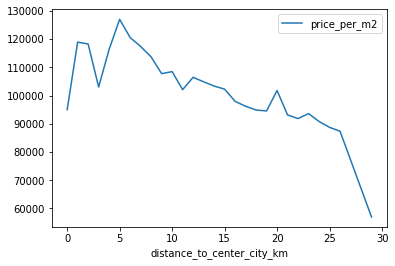

In [51]:
#построим график изменения цены за квадратный метр с увеличением расстояния от центра города
dependence_on_center.plot()
plt.show()

**Вывод** Определим радиус центральной зоны - 10 км

### Сегмент квартир в центре 

In [52]:
#выделим часть таблицы с квартирами в центре (distance_to_center_city_km <= 10)
center_city = filtred_df.query('distance_to_center_city_km <= 10')

In [53]:
#посмотрим на описательные статистики площади, цены, количества комнат, высоты потолков в центре
center_city[['total_area_m2','rooms','price_per_m2','ceiling_height_m']].describe()

,total_area_m2,rooms,price_per_m2,ceiling_height_m
count,1358.000000,1358.000000,1358.000000,1358.000000
mean,52.595943,1.866716,113921.579529,2.740685
std,16.594278,0.773014,26685.136578,0.200077
min,12.000000,0.000000,17391.000000,2.400000
25%,41.000000,1.000000,96111.000000,2.550000
50%,50.000000,2.000000,109561.000000,2.700000
75%,64.000000,2.000000,128678.750000,2.950000
max,107.000000,3.000000,312240.000000,3.120000


In [54]:
# посмотрим те же самые статистики для всеё таблицы
filtred_df[['total_area_m2','rooms','price_per_m2','ceiling_height_m']].describe()

,total_area_m2,rooms,price_per_m2,ceiling_height_m
count,9097.000000,9097.000000,9097.000000,9097.000000
mean,49.958335,1.803012,92494.263054,2.643201
std,15.258243,0.782040,27574.589152,0.147859
min,12.000000,0.000000,9615.000000,2.200000
25%,38.000000,1.000000,76470.000000,2.500000
50%,46.500000,2.000000,93366.000000,2.600000
75%,60.000000,2.000000,108750.000000,2.720000
max,107.300000,3.000000,312240.000000,3.120000


**Выводы**: Средняя общая площадь в центре больше, чем в среднем по всей выборке. Так же немного выше "средний" потолок. Так же цена в центре ожидаемо выше, чем по всей выборке

In [55]:
#посчитаем 2 коэффициента корреляции по интересующим нас факторам и сравним 
#начнём с комнат
display(center_city['price_per_m2'].corr(spb_df['rooms']),
        filtred_df['price_per_m2'].corr(filtred_df['rooms']))

-0.4393649308093994

-0.2738565931538932

**Вывод**: Отрицательная корреляция с количеством комнат в центре выше. 

In [56]:
#удаленность от центра?
display(center_city['price_per_m2'].corr(spb_df['distance_to_center_city_km']),
        filtred_df['price_per_m2'].corr(filtred_df['distance_to_center_city_km']))

-0.14267521558009905

-0.3974093244294583

**Вывод**: Здесь наоборот. Удалённость от центра в центре не так сильно влияет на стоимость квартира. Ведь все наши квартиры в center_city изначально находятся в центре

In [57]:
#статус этажа?
display(pd.pivot_table(spb_df, \
                        index = 'status_floor',\
                        values = 'price_per_m2',\
                        aggfunc = ['mean','median','max','min']))

,mean,median,max,min
,price_per_m2,price_per_m2,price_per_m2,price_per_m2
status_floor,,,,
другой,106253.819592,103192.5,248484,37234
первый,94098.053375,91346.0,192592,17391
последний,101936.281972,98253.0,312240,46341


**Вывод**: Всё аналогично с общей таблицой. По стоимости за квадратный метр: первый этаж < последний < любой другой

In [58]:
#день размещения объявление 
display(pd.pivot_table(spb_df, \
                        index = 'day_exposition',\
                        values = 'price_per_m2',\
                        aggfunc = ['mean','median','max','min']))

,mean,median,max,min
,price_per_m2,price_per_m2,price_per_m2,price_per_m2
day_exposition,,,,
Friday,104688.015968,101592.0,240000,37234
Monday,104693.825083,101681.0,189486,37234
Saturday,103876.778723,100977.0,248484,60937
Sunday,105189.695652,101950.0,201729,41911
Thursday,105293.037753,102532.0,201315,41025
Tuesday,103508.276139,100222.0,312240,17391
Wednesday,104353.712702,101364.5,234920,56718


**Вывод**: День недели не влияет на стоимость за квадратный метр( как и по всей таблице)

In [59]:
#месяц размещения объявление 
display(pd.pivot_table(spb_df, \
                        index = 'month_exposition',\
                        values = 'price_per_m2',\
                        aggfunc = ['mean','median','max','min']))

,mean,median,max,min
,price_per_m2,price_per_m2,price_per_m2,price_per_m2
month_exposition,,,,
April,105713.887290,101063.0,312240,58916
August,104129.510018,101161.0,248484,56976
December,106286.149871,102990.0,234920,65000
February,104331.275720,100981.0,200119,46341
January,106630.237288,103283.5,219512,62106
July,103329.146694,100445.0,200000,17391
June,103080.828205,100000.0,210176,63440
March,105020.505068,102532.0,198950,42857


**Вывод**: Месяц  не влияет на стоимость за квадратный метр ( как и в общей таблице)

In [60]:
pd.pivot_table(spb_df,index = 'year_exposition',\
                    values = 'price_per_m2',\
                    aggfunc = ['mean','median','max','min'])

,mean,median,max,min
,price_per_m2,price_per_m2,price_per_m2,price_per_m2
year_exposition,,,,
2015,99886.363636,96402,234920,59649
2016,100014.004396,96774,214285,42857
2017,101453.209270,98623,237500,41025
2018,105951.134803,102957,248484,17391
2019,113760.028037,111111,312240,70626


**Вывод**. Аналогично со всей таблицей: С каждым годом квадратный метр дорожает и дорожает...

## Общий вывод

Итак, мы проанализировали параметры влияющие на стоимости квартиры в Санкт-Петербурге и его окраинах и пришли к следующим выводам:
- С каждым годоv стоимость жилья увеличивается, вне зависимости от месторасположения
- Квартиры на первом этаже - самые дешёвые, на последнем - выше, чем на первом , но меньше, чем на любом другом
- Квартиры в Санкт-Петербурге дороже, чем на его окраинах или соседних locality 
- Чем ближе квартиры к центру, тем выше стоимость квадратного метра
- Чем больше площадь квартиры, число комнат, тем стоимость выше